# IKpy Quickstart #

Import the IKPy module : 

In [57]:
import ikpy.chain
import numpy as np
import ikpy.utils.plot as plot_utils

The basic element of IKPy is the kinematic `Chain`.
To create a chain from an URDF file : 

In [58]:
my_chain = ikpy.chain.Chain.from_urdf_file("./ur5/ur5_gripper.urdf")

# Inverse kinematics

In Inverse Kinematics, you want your kinematic chain to reach a 3D position in space.

To have a more general representation of position, IKPy works with homogeneous coordinates. Homogenous coordinates are represented as a 4x4 matrix storing both position and orientation. Here we only consider (x,y,z) position, not orientation of the chain.

In [63]:
target_position = [0,2,0]

In [64]:
print("The joint angles are : ", my_chain.inverse_kinematics(target_position))

The joint angles are :  [ 0.00000000e+00  1.43783987e+00  4.49531347e-02  5.07153027e-05
 -8.65386817e-01  1.36705917e+00  0.00000000e+00  0.00000000e+00]


You can check that the Inverse Kinematics is correct by comparing with the original position vector : 

In [65]:
real_frame = my_chain.forward_kinematics(my_chain.inverse_kinematics(target_position))
print("Computed position vector : %s, goal position vector : %s" % (real_frame[:3, 3], target_position))

Computed position vector : [1.07157496e-06 9.48989495e-01 4.68176289e-02], goal position vector : [0, 2, 0]


# Plotting
And finally plot the result : 

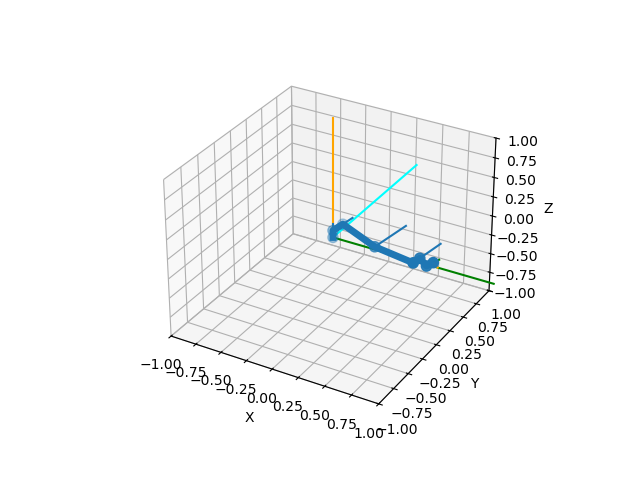

In [62]:
%matplotlib notebook
%matplotlib ipympl

import matplotlib.pyplot as plt
fig, ax = plot_utils.init_3d_figure()
my_chain.plot(my_chain.inverse_kinematics(target_position), ax, target=target_position)
